In [68]:
%matplotlib inline

from keras.datasets import mnist
from keras.utils import to_categorical

In [69]:
# Splitting the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [70]:
# One hot ecoding the label
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

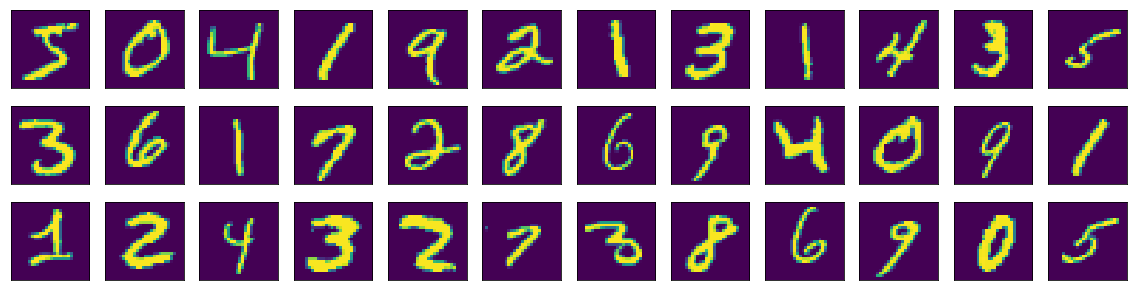

In [71]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i])

In [81]:
# Apply some scaling
X_train = X_train / 255
X_test = X_test / 255

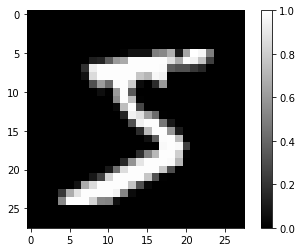

In [82]:
# Control results
plt.imshow(X_train[0],cmap='gray')
plt.colorbar()

In [83]:
# We need a depth for keras
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [84]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define a basic model architecture
model = Sequential()
 
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
          
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               200832    
__________

In [85]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy', 'mean_squared_error'])

In [ ]:
from keras.callbacks import ModelCheckpoint   

# Train our model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=100, epochs=10,
          validation_data=(X_test, y_test), callbacks=[checkpointer], 
          verbose=1, shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
19000/60000 [========>.....................] - ETA: 24s - loss: 0.0904 - acc: 0.9739 - mean_squared_error: 0.0041